In [17]:
# Import the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations
lats = np.random.uniform(-90,90, size = 1500)
lngs = np.random.uniform(-180,180, size = 15000)
lat_lngs = zip(lats,lngs)
lat_lngs

In [3]:
#Add the latitudes and longitudes to a list
coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

19.65723911051701 -178.73824644224774
-56.36538747588601 -32.976503627170246
-16.210055366977997 3.345019487554538
-27.201823205304542 -92.2933749409568
-38.87512190452536 -9.555317600565388
87.82429597355554 -53.384094817166044
-10.3648430915797 -140.0727732587927
-34.943150424513746 -79.74016741640055
36.748457938411974 137.92505606425794
-79.01459132215467 4.872778150116204
-12.554414489432233 0.9911487158736065
87.90463484425129 -81.24483262347832
-42.63733722867655 -147.17739023863345
-41.77438417493645 128.1817731542248
-8.521985568220956 117.70981858219824
40.02240997012575 147.47292081395443
-80.4707028239376 -179.3669137636681
-56.76205197346331 -158.08178080694904
-31.424927705595913 -19.060694693631064
-67.61301499276799 127.26684504712046
65.57878026300983 -24.318304982831535
-48.76631057968438 64.63815690616897
29.590605587754155 103.77244372373707
-12.761793431075162 -162.4186396754995
80.10663414187815 31.49506663062374
-67.91393075182084 -59.9844248410983
-86.1026909791

In [5]:
# Use the citypy module to determine city based on latitude and longitude
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

607

In [7]:
# Import the requests library
import requests

# Import the API key
from config import weather_api_key

In [8]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [9]:
# Import the time library and the datetime module from the datetime library
import time
from datetime import datetime

In [10]:
# Create an empty list to hold the weather data
city_data = []

# Print the beginning of the logging
print("Beginning Data Retrieval   ")
print("---------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval   
---------------------------
Processing Record 1 of Set 1 | kapaa
Processing Record 2 of Set 1 | chuy
Processing Record 3 of Set 1 | namibe
Processing Record 4 of Set 1 | marcona
City not found. Skipping...
Processing Record 5 of Set 1 | jamestown
Processing Record 6 of Set 1 | upernavik
Processing Record 7 of Set 1 | atuona
Processing Record 8 of Set 1 | lebu
Processing Record 9 of Set 1 | omachi
Processing Record 10 of Set 1 | hermanus
Processing Record 11 of Set 1 | qaanaaq
Processing Record 12 of Set 1 | mataura
Processing Record 13 of Set 1 | esperance
Processing Record 14 of Set 1 | sumbawa
City not found. Skipping...
Processing Record 15 of Set 1 | nemuro
Processing Record 16 of Set 1 | vaini
Processing Record 17 of Set 1 | new norfolk
Processing Record 18 of Set 1 | olafsvik
Processing Record 19 of Set 1 | saint-philippe
Processing Record 20 of Set 1 | leshan
Processing Record 21 of Set 1 | avarua
Processing Record 22 of Set 1 | berlevag
Processing Re

Processing Record 37 of Set 4 | tiksi
Processing Record 38 of Set 4 | lashio
Processing Record 39 of Set 4 | katsuura
Processing Record 40 of Set 4 | kampot
Processing Record 41 of Set 4 | kushiro
Processing Record 42 of Set 4 | tubruq
City not found. Skipping...
Processing Record 43 of Set 4 | jetpur
Processing Record 44 of Set 4 | boa vista
Processing Record 45 of Set 4 | progreso
Processing Record 46 of Set 4 | dwarka
Processing Record 47 of Set 4 | astoria
Processing Record 48 of Set 4 | los llanos de aridane
Processing Record 49 of Set 4 | belyy yar
Processing Record 50 of Set 4 | grand river south east
City not found. Skipping...
Processing Record 1 of Set 5 | lata
Processing Record 2 of Set 5 | almeirim
Processing Record 3 of Set 5 | sentyabrskiy
City not found. Skipping...
Processing Record 4 of Set 5 | brindisi
Processing Record 5 of Set 5 | farafangana
Processing Record 6 of Set 5 | khatanga
Processing Record 7 of Set 5 | pareora
Processing Record 8 of Set 5 | samusu
City not

Processing Record 25 of Set 8 | karaidel
Processing Record 26 of Set 8 | airai
Processing Record 27 of Set 8 | whitehorse
Processing Record 28 of Set 8 | karaul
City not found. Skipping...
Processing Record 29 of Set 8 | rengo
Processing Record 30 of Set 8 | ulladulla
Processing Record 31 of Set 8 | labuhan
Processing Record 32 of Set 8 | palana
Processing Record 33 of Set 8 | sola
Processing Record 34 of Set 8 | dezhou
Processing Record 35 of Set 8 | port blair
Processing Record 36 of Set 8 | hervey bay
Processing Record 37 of Set 8 | tagusao
Processing Record 38 of Set 8 | grand baie
Processing Record 39 of Set 8 | alofi
Processing Record 40 of Set 8 | gariaband
Processing Record 41 of Set 8 | lagoa
Processing Record 42 of Set 8 | noyabrsk
Processing Record 43 of Set 8 | half moon bay
Processing Record 44 of Set 8 | opuwo
Processing Record 45 of Set 8 | emba
Processing Record 46 of Set 8 | tera
Processing Record 47 of Set 8 | muisne
Processing Record 48 of Set 8 | qarqin
Processing R

Processing Record 15 of Set 12 | nakhon phanom
Processing Record 16 of Set 12 | george
Processing Record 17 of Set 12 | bandarban
Processing Record 18 of Set 12 | bireun
Processing Record 19 of Set 12 | bourg-en-bresse
Processing Record 20 of Set 12 | dzilam gonzalez
Processing Record 21 of Set 12 | kilindoni
Processing Record 22 of Set 12 | port-gentil
Processing Record 23 of Set 12 | milkovo
Processing Record 24 of Set 12 | jiexiu
Processing Record 25 of Set 12 | marsh harbour
Processing Record 26 of Set 12 | castelo branco
Processing Record 27 of Set 12 | taywarah
Processing Record 28 of Set 12 | flin flon
Processing Record 29 of Set 12 | susanville
Processing Record 30 of Set 12 | zapolyarnyy
Processing Record 31 of Set 12 | hopewell
Processing Record 32 of Set 12 | quchan
Processing Record 33 of Set 12 | waitara
Processing Record 34 of Set 12 | eyl
Processing Record 35 of Set 12 | bolungarvik
City not found. Skipping...
Processing Record 36 of Set 12 | grindavik
Processing Record 

In [11]:
len(city_data)

556

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kapaa,22.0752,-159.3190,80.92,60,0,13.80,US,2022-12-02 02:24:29
1,Chuy,-33.6971,-53.4616,68.16,98,48,4.25,UY,2022-12-02 02:24:30
2,Namibe,-15.1961,12.1522,68.90,81,99,7.67,AO,2022-12-02 02:24:30
3,Jamestown,42.0970,-79.2353,31.59,85,100,9.22,US,2022-12-02 02:20:41
4,Upernavik,72.7868,-56.1549,-3.41,100,30,17.29,GL,2022-12-02 02:24:31
5,Atuona,-9.8000,-139.0333,78.13,69,1,18.88,PF,2022-12-02 02:21:42
6,Lebu,-37.6167,-73.6500,53.47,80,1,18.07,CL,2022-12-02 02:24:31
7,Omachi,36.5000,137.8667,41.74,63,86,1.61,JP,2022-12-02 02:24:31
8,Hermanus,-34.4187,19.2345,60.80,83,97,12.88,ZA,2022-12-02 02:24:31
9,Qaanaaq,77.4840,-69.3632,-24.77,73,0,8.10,GL,2022-12-02 02:24:32


In [13]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Kapaa,US,2022-12-02 02:24:29,22.0752,-159.3190,80.92,60,0,13.80
1,Chuy,UY,2022-12-02 02:24:30,-33.6971,-53.4616,68.16,98,48,4.25
2,Namibe,AO,2022-12-02 02:24:30,-15.1961,12.1522,68.90,81,99,7.67
3,Jamestown,US,2022-12-02 02:20:41,42.0970,-79.2353,31.59,85,100,9.22
4,Upernavik,GL,2022-12-02 02:24:31,72.7868,-56.1549,-3.41,100,30,17.29
5,Atuona,PF,2022-12-02 02:21:42,-9.8000,-139.0333,78.13,69,1,18.88
6,Lebu,CL,2022-12-02 02:24:31,-37.6167,-73.6500,53.47,80,1,18.07
7,Omachi,JP,2022-12-02 02:24:31,36.5000,137.8667,41.74,63,86,1.61
8,Hermanus,ZA,2022-12-02 02:24:31,-34.4187,19.2345,60.80,83,97,12.88
9,Qaanaaq,GL,2022-12-02 02:24:32,77.4840,-69.3632,-24.77,73,0,8.10


In [14]:
# Create the output file (CSV).
output_data_file = "Weather_Data/cities.csv"

# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

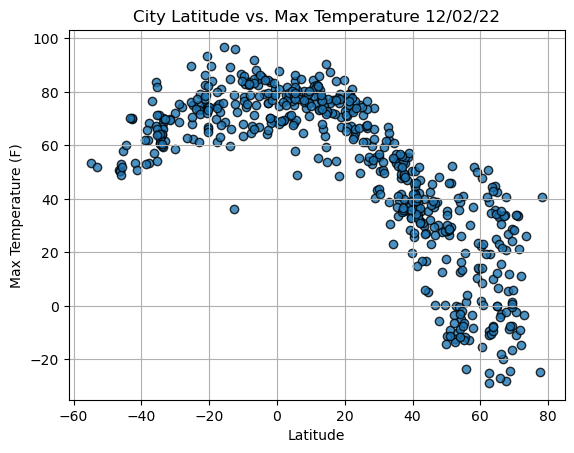

In [18]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

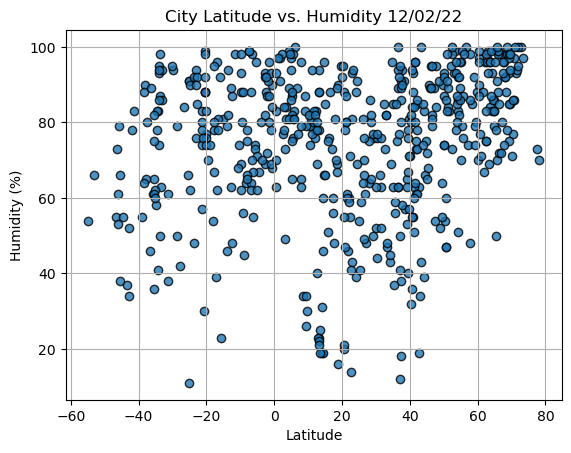

In [19]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

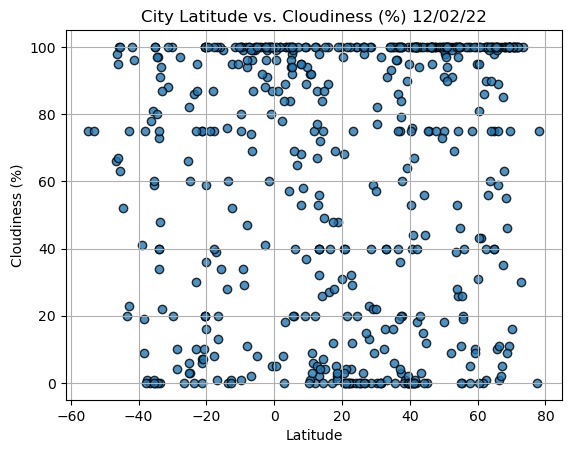

In [20]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

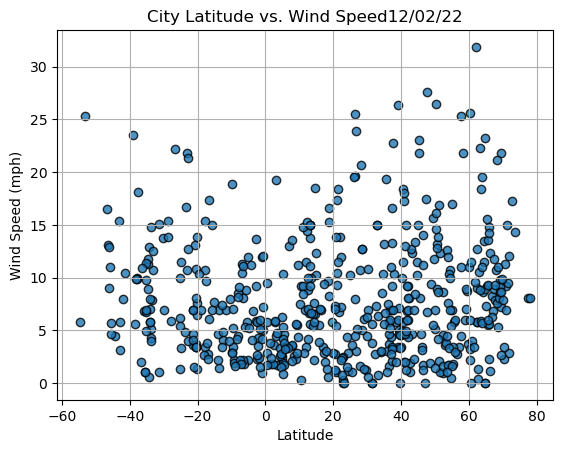

In [21]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed"+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()